## Implementing binary decision trees

# Load the lending club dataset

In [103]:
import pandas as pd 
import numpy as np

In [104]:
loans = pd.read_csv('lending-club-data.csv', low_memory=False)
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop(columns='bad_loans')

In [105]:
features = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home_ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]
target = 'safe_loans'
loans = loans[features + [target]]

<Axes: xlabel='safe_loans'>

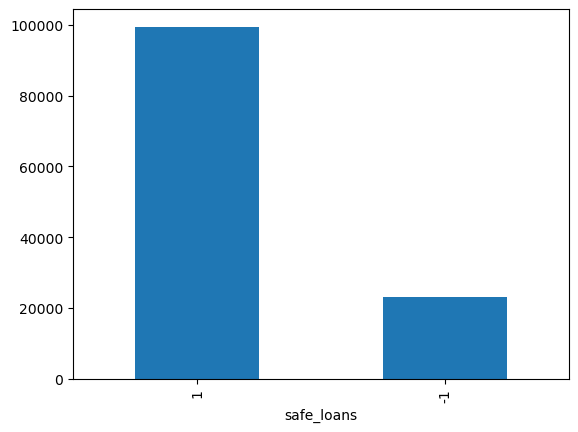

In [106]:
loans['safe_loans'].value_counts().plot.bar()

Function to count number of mistakes while predicting majority class

In [107]:
def intermediate_node_num_mistakes(labels_in_node):
    # Corner case: If labels_in_node is empty, return 0
    if len(labels_in_node) == 0:
        return 0    
    # Count the number of 1's (safe loans)
    safe_loans = len(labels_in_node[labels_in_node==1])
    # Count the number of -1's (risky loans)
    risky_loans = len(labels_in_node[labels_in_node==-1])        
    # Return the number of mistakes that the majority classifier makes.
    return np.min([safe_loans, risky_loans])

In [108]:
# Test case 1

example_labels = np.array([-1, -1, 1, 1, 1])

if intermediate_node_num_mistakes(example_labels) == 2:
    print('Test passed!')
else:
    print('Test 1 failed... try again!')

# Test case 2
example_labels = np.array([-1, -1, 1, 1, 1, 1, 1])
if intermediate_node_num_mistakes(example_labels) == 2:
    print('Test passed!')
else:
    print('Test 3 failed... try again!')
    
# Test case 3
example_labels = np.array([-1, -1, -1, -1, -1, 1, 1])
if intermediate_node_num_mistakes(example_labels) == 2:
    print('Test passed!')
else:
    print('Test 3 failed... try again!')

Test passed!
Test passed!
Test passed!


One hot encoding

In [109]:
categorical_variables = loans.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas identificadas: {categorical_variables}")

Variables categóricas identificadas: ['grade', 'term', 'home_ownership', 'emp_length']


In [110]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)
loans_encoded_data = encoder.fit_transform(loans[categorical_variables])

In [111]:
# Obtener los nombres de las nuevas columnas
feature_names = []
for i, feature in enumerate(categorical_variables):
    feature_vals = encoder.categories_[i]
    for val in feature_vals:
        feature_names.append(f"{feature}_{val}")
len(feature_names)

25

In [112]:
# Crear un DataFrame con las variables codificadas
loans_encoded_df = pd.DataFrame(loans_encoded_data, columns=feature_names)

# Eliminar las columnas categóricas originales y agregar las nuevas columnas codificadas
loans_numeric_data = loans.drop(columns=categorical_variables)

loans_encoded_df.index=loans_numeric_data.index
loans_enc_data = pd.concat([loans_numeric_data, loans_encoded_df], axis=1)


In [113]:
train_idx = pd.read_json('module-5-assignment-2-train-idx.json')
test_idx = pd.read_json('module-5-assignment-2-test-idx.json')
train_data = loans_enc_data.iloc[train_idx[0].values]
test_data = loans_enc_data.iloc[test_idx[0].values]

In [114]:
train_data

,safe_loans,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months,...,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_nan
1,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122572,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122575,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122588,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122599,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
print("Total number of grade_A loans : %s" % str(train_data['grade_A'].sum()+test_data['grade_A'].sum()))
print("Expexted answer               : 6422")

Total number of grade_A loans : 6422.0
Expexted answer               : 6422


Function to pick best feature to split on

In [116]:
def best_splitting_feature(data, features, target):

    best_feature = None # Keep track of the best feature 
    best_error = 10     # Keep track of the best error so far 
    # Note: Since error is always <= 1, we should intialize it with something larger than 1.

    # Convert to float to make sure error gets computed correctly.
    num_data_points = float(len(data))  
    
    # Loop through each feature to consider splitting on that feature
    for feature in features:
        
        # The left split will have all data points where the feature value is 0
        left_split = data[data[feature] == 0]
        
        # The right split will have all data points where the feature value is 1
        right_split =  data[data[feature] == 1]
            
        # Calculate the number of misclassified examples in the left split.
        # Remember that we implemented a function for this! (It was called intermediate_node_num_mistakes)
        left_mistakes = intermediate_node_num_mistakes(left_split[target])

        # Calculate the number of misclassified examples in the right split.
        right_mistakes = intermediate_node_num_mistakes(right_split[target])
            
        # Compute the classification error of this split.
        # Error = (# of mistakes (left) + # of mistakes (right)) / (# of data points)
        error = (left_mistakes + right_mistakes)/num_data_points

        # If this is the best error we have found so far, store the feature as best_feature and the error as best_error
        if error < best_error:
            best_feature = feature
            best_error = error
        
    
    return best_feature # Return the best feature we found

In [117]:
if best_splitting_feature(train_data, feature_names, 'safe_loans') == 'term_ 36 months':
    print('Test passed!')
else:
    print('Test failed... try again!')

Test passed!


Building the tree

In [118]:
def create_leaf(target_values):    
    # Create a leaf node
    leaf = {'splitting_feature' : None,
            'left' : None,
            'right' : None,
            'is_leaf': True}   ## YOUR CODE HERE 
   
    # Count the number of data points that are +1 and -1 in this node.
    num_ones = len(target_values[target_values == 1])
    num_minus_ones = len(target_values[target_values == -1])    

    # For the leaf node, set the prediction to be the majority class.
    # Store the predicted class (1 or -1) in leaf['prediction']
    if num_ones > num_minus_ones:
        leaf['prediction'] = 1
    else:
        leaf['prediction'] = -1

    # Return the leaf node
    return leaf 

In [124]:
def decision_tree_create(data, features, target, current_depth = 0, max_depth = 10):
    remaining_features = features[:] # Make a copy of the features.
    
    target_values = data[target]
    print("--------------------------------------------------------------------")
    print("Subtree, depth = %s (%s data points)." % (current_depth, len(target_values)))
    

    # Stopping condition 1
    # (Check if there are mistakes at current node.
    # Recall you wrote a function intermediate_node_num_mistakes to compute this.)
    if  intermediate_node_num_mistakes(target_values)== 0:  
        print("Stopping condition 1 reached.")     
        # If not mistakes at current node, make current node a leaf node
        return create_leaf(target_values)
    
    # Stopping condition 2 (check if there are remaining features to consider splitting on)
    if remaining_features == []:   
        print("Stopping condition 2 reached.")   
        # If there are no remaining features to consider, make current node a leaf node
        return create_leaf(target_values)    
    
    # Additional stopping condition (limit tree depth)
    if current_depth >= max_depth:  
        print("Reached maximum depth. Stopping for now.")
        # If the max tree depth has been reached, make current node a leaf node
        return create_leaf(target_values)

    # Find the best splitting feature (recall the function best_splitting_feature implemented above)
    splitting_feature = best_splitting_feature(data, remaining_features, target)

    
    # Split on the best feature that we found. 
    left_split = data[data[splitting_feature] == 0]
    right_split = data[data[splitting_feature] == 1]
    remaining_features.remove(splitting_feature)
    print("Split on feature %s. (%s, %s)" % (\
                      splitting_feature, len(left_split), len(right_split)))
    
    # Create a leaf node if the split is "perfect"
    if len(left_split) == len(data):
        print("Creating leaf node.")
        return create_leaf(left_split[target])
    if len(right_split) == len(data):
        print("Creating leaf node.")
        return create_leaf(right_split[target])

        
    # Repeat (recurse) on left and right subtrees
    left_tree = decision_tree_create(left_split, remaining_features, target, current_depth + 1, max_depth)        
    right_tree = decision_tree_create(right_split, remaining_features, target, current_depth + 1, max_depth)        

    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

In [120]:
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

In [125]:
small_data_decision_tree = decision_tree_create(train_data, feature_names, 'safe_loans', max_depth = 3)
if count_nodes(small_data_decision_tree) == 13:
    print('Test passed!')
else:
    print('Test failed... try again!')
    print('Number of nodes found                :', count_nodes(small_data_decision_tree))
    print('Number of nodes that should be there : 13' )

--------------------------------------------------------------------
Subtree, depth = 0 (37224 data points).
Split on feature term_ 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 1 (9223 data points).
Split on feature grade_A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 2 (9122 data points).
Split on feature grade_B. (8074, 1048)
--------------------------------------------------------------------
Subtree, depth = 3 (8074 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (1048 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (101 data points).
Split on feature emp_length_nan. (96, 5)
--------------------------------------------------------------------
Subtree, depth = 3 (96 data points)

In [126]:
my_decision_tree = decision_tree_create(train_data, feature_names, target, max_depth=6)

--------------------------------------------------------------------
Subtree, depth = 0 (37224 data points).
Split on feature term_ 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 1 (9223 data points).
Split on feature grade_A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 2 (9122 data points).
Split on feature grade_B. (8074, 1048)
--------------------------------------------------------------------
Subtree, depth = 3 (8074 data points).
Split on feature grade_C. (5884, 2190)
--------------------------------------------------------------------
Subtree, depth = 4 (5884 data points).
Split on feature grade_D. (3826, 2058)
--------------------------------------------------------------------
Subtree, depth = 5 (3826 data points).
Split on feature grade_E. (1693, 2133)
--------------------------------------------------------------------
Subtree, depth = 6 (1693 data points).
R

Making predictions with a decision tree

In [171]:
def classify(tree, x, annotate = False):
    # if the node is a leaf node.
    if tree['is_leaf']:
        if annotate:
             print("At leaf, predicting %s" % tree['prediction'])
        return tree['prediction']
    else:
        # split on feature.
        split_feature_value = x[tree['splitting_feature']]
        if annotate:
             print("Split on %s = %s" % (tree['splitting_feature'], split_feature_value))
        if (split_feature_value == 0).values:
            return classify(tree['left'], x, annotate)
        else:
            return classify(tree['right'], x, annotate)
            

In [137]:
print(test_data[0:1]['grade_A']==0)
#print('Predicted class: %s ' % classify(my_decision_tree, test_data[0:1]))

24    True
Name: grade_A, dtype: bool


In [170]:
if (test_data[0:1]['grade_A']==0).values:   
    print('h')

h


In [175]:
print(test_data[0:1])
print('Predicted class: %s ' % classify(my_decision_tree, test_data[0:1]))

    safe_loans  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
24          -1      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

    term_ 36 months  term_ 60 months  ...  emp_length_2 years  \
24              0.0              1.0  ...                 1.0   

    emp_length_3 years  emp_length_4 years  emp_length_5 years  \
24                 0.0                 0.0                 0.0   

    emp_length_6 years  emp_length_7 years  emp_length_8 years  \
24                 0.0                 0.0                 0.0   

    emp_length_9 years  emp_length_< 1 year  emp_length_nan  
24                 0.0                  0.0             0.0  

[1 rows x 26 columns]
Predicted class: -1 


In [176]:
classify(my_decision_tree, test_data[0:1], annotate=True)

Split on term_ 36 months = 24    0.0
Name: term_ 36 months, dtype: float64
Split on grade_A = 24    0.0
Name: grade_A, dtype: float64
Split on grade_B = 24    0.0
Name: grade_B, dtype: float64
Split on grade_C = 24    0.0
Name: grade_C, dtype: float64
Split on grade_D = 24    1.0
Name: grade_D, dtype: float64
At leaf, predicting -1


-1

In [194]:
def evaluate_classification_error(tree, data, target):
    # Apply the classify(tree, x) to each row in your data
    prediction = [classify(tree, data[i:i+1]) for i in range(len(data))]
    
    # Once you've made the predictions, calculate the classification error and return it
    no_mistakes = abs(prediction + data[target])/2
    num_mistakes = len(data) - no_mistakes.sum()
    return float(num_mistakes)/len(data)

In [195]:
evaluate_classification_error(my_decision_tree, test_data, target)

0.3837785437311504

In [200]:
def print_stump(tree, name = 'root'):
    split_name = tree['splitting_feature'] # split_name is something like 'term. 36 months'
    if split_name is None:
        print("(leaf, label: %s)" % tree['prediction'])
        return None
    split_feature, split_value = split_name.split('_')
    print('                       %s' % name)
    print('         |---------------|----------------|')
    print('         |                                |')
    print('         |                                |')
    print('         |                                |')
    print('  [{0} == 0]               [{0} == 1]    '.format(split_name))
    print('         |                                |')
    print('         |                                |')
    print('         |                                |')
    print('    (%s)                         (%s)' \
        % (('leaf, label: ' + str(tree['left']['prediction']) if tree['left']['is_leaf'] else 'subtree'),
           ('leaf, label: ' + str(tree['right']['prediction']) if tree['right']['is_leaf'] else 'subtree')))

In [201]:
print_stump(my_decision_tree)

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [term_ 36 months == 0]               [term_ 36 months == 1]    
         |                                |
         |                                |
         |                                |
    (subtree)                         (subtree)


In [202]:
print_stump(my_decision_tree['left'], my_decision_tree['splitting_feature'])

                       term_ 36 months
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade_A == 0]               [grade_A == 1]    
         |                                |
         |                                |
         |                                |
    (subtree)                         (subtree)


In [203]:
print_stump(my_decision_tree['left']['left'], my_decision_tree['left']['splitting_feature'])

                       grade_A
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade_B == 0]               [grade_B == 1]    
         |                                |
         |                                |
         |                                |
    (subtree)                         (subtree)


In [204]:
print_stump(my_decision_tree['right'], my_decision_tree['splitting_feature'])

                       term_ 36 months
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade_D == 0]               [grade_D == 1]    
         |                                |
         |                                |
         |                                |
    (subtree)                         (leaf, label: -1)


In [206]:
print_stump(my_decision_tree['right']['left'], my_decision_tree['left']['splitting_feature'])

                       grade_A
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade_E == 0]               [grade_E == 1]    
         |                                |
         |                                |
         |                                |
    (subtree)                         (leaf, label: -1)
